# Aliasing
### The reason that strange artifacts appear in sampled signals.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
plt.style.use('fivethirtyeight')

In [5]:
def getSamplesAndFFT(N, fs, f_sin):
    # create wave from parameters
    x = np.linspace(0, N / fs, N - 1)
    y = np.sin(f_sin * 2 * np.pi * x)

    # fft of sampled sin wave
    xf = np.linspace(- fs / 2, fs / 2, N - 1, endpoint=False)
    yf = abs(scipy.fftpack.fft(y))
    yf = [w / fs for w in yf]   # account for sampling scaling
    yf = scipy.fftpack.fftshift(yf)
    return [x, y, xf, yf]

In [6]:
# number of samples and analog wave frequency
N = 8000
f_sin = 500

# oversampling 500 hz sin wave at 4000 hz
fs = 4000
[x, y, xf, yf] = getSamplesAndFFT(N, fs, f_sin)

In [7]:
# undersampling 500 hz sin wave at 800 hz
fs2 = 800
[x1, y1, xf1, yf1] = getSamplesAndFFT(N, fs2, f_sin)

In [4]:
def samplePlot(axis, x, y, fs, f_sin):
    # display first three periods of original signal
    fs_ideal = 10000
    n_display = int(fs_ideal / f_sin) * 3
    x_ideal = np.linspace(0, n_display / fs_ideal, n_display - 1)
    y_ideal = np.sin(f_sin * 2 * np.pi * x_ideal)
    axis.plot(x_ideal, y_ideal)

    # display samples taken from three periods of signal
    n_display = 3 * int(fs / f_sin)
    axis.plot(x[:n_display + 1], y[:n_display + 1], 'ro')
    axis.set(xlabel='Time (sec)', ylabel='Amplitude')

In [3]:
def fftPlot(axis, xf, yf, fs):
    axis.plot(xf, yf)
    axis.set(xlabel='Frequency (Hz)', ylabel='Real')


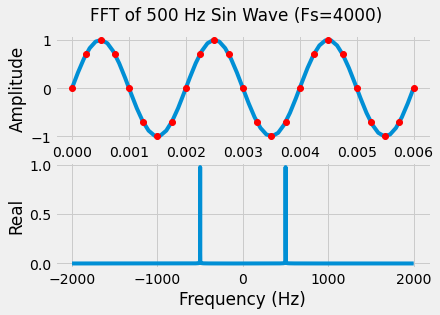

In [8]:
# plot oversampled sin wave and fft results
fig, axs = plt.subplots(2, 1)
fig.suptitle('FFT of ' + str(f_sin) + ' Hz Sin Wave (Fs=' + str(fs) + ')')
samplePlot(axs[0], x, y, fs, f_sin)
fftPlot(axs[1], xf, yf, fs)

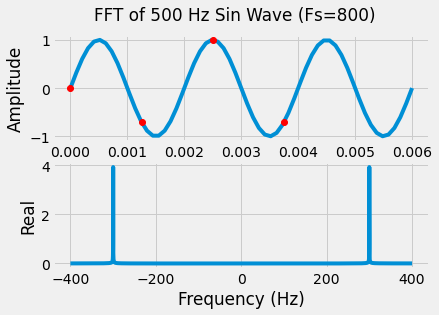

In [9]:
# plot undersampled sin wave and fft results
fig2, axs2 = plt.subplots(2, 1)
fig2.suptitle('FFT of ' + str(f_sin) + ' Hz Sin Wave (Fs=' + str(fs2) + ')')
samplePlot(axs2[0], x1, y1, fs2, f_sin)
fftPlot(axs2[1], xf1, yf1, fs2)
plt.show()

Now that we have seen that sampling gives us unexpected FFT results, we can bridge the gap in our understanding with one more visual.

In [ ]:
# TODO show that 500 hz and 350 hz signal hit the same sampled points